## Exploratory data analysis (EDA): pairplots for hardness and corrosion datasets

**Author:** Y.X. Wu


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.rcParams['font.family'] = 'FreeSans'

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../01_Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Hardness_YW_v3_processed.xlsx'))


'Current working directory: /nethome/home3/yuxiang.wu/CCA_CALPHAD_SSS_ML/CCA_representation_ML/02_Dataset_EDA_Feature_UMAP_Mahalanobis'

True

### Import hardness dataset


In [2]:
# Declare column names for the chemical composition dataframe, specific testing conditions, selected features, and output for Hardness and Corrosion datasets.
compo_column = ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si',
                'Mn', 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf']
C_specific_testing_column = ['TestTemperature_C',
                             'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']
specific_features_sel_column = ['delta_a', 'Tm', 'sigma_Tm',
                                'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC']
H_output_column = ['converted HV']
C_output_column = ['AvgPittingPotential_mV']

# Load the Hardness and Corrosion datasets
df_H = pd.read_excel(
    data_path + 'LiteratureDataset_Hardness_YW_v3_processed.xlsx')
df_C = pd.read_excel(
    data_path + 'LiteratureDataset_Corrosion_YW_v3_processed.xlsx')

# Partition the datasets into component composition, specific features, and output data
df_H_compo, df_H_specific_features, df_H_output = df_H[compo_column], df_H[
    specific_features_sel_column], df_H[H_output_column]
(df_C_compo, df_C_specific_testing,
 df_C_specific_features, df_C_output) = df_C[compo_column], df_C[C_specific_testing_column], df_C[specific_features_sel_column], df_C[C_output_column]

df_H_compo_specific_features = pd.concat(
    [df_H_compo, df_H_specific_features], axis=1)
df_C_compo_specific_features = pd.concat(
    [df_C_compo, df_C_specific_features], axis=1)


# Display the column names and shape (number of rows and columns) of each dataframe for verification and data insight
display(df_H_compo.columns, df_H_compo.shape)
display(df_H_specific_features.columns, df_H_specific_features.shape)
display(df_H_output.columns, df_H_output.shape)

display(df_C_compo.columns, df_C_compo.shape)
display(df_C_specific_testing.columns, df_C_specific_testing.shape)
display(df_C_specific_features.columns, df_C_specific_features.shape)
display(df_C_output.columns, df_C_output.shape)

display(df_H_compo_specific_features.columns,
        df_H_compo_specific_features.shape)
display(df_C_compo_specific_features.columns,
        df_C_compo_specific_features.shape)

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')

(680, 20)

Index(['delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega',
       'VEC', 'sigma_VEC'],
      dtype='object')

(680, 8)

Index(['converted HV'], dtype='object')

(680, 1)

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')

(712, 20)

Index(['TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs'], dtype='object')

(712, 4)

Index(['delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega',
       'VEC', 'sigma_VEC'],
      dtype='object')

(712, 8)

Index(['AvgPittingPotential_mV'], dtype='object')

(712, 1)

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a', 'Tm',
       'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC',
       'sigma_VEC'],
      dtype='object')

(680, 28)

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a', 'Tm',
       'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC',
       'sigma_VEC'],
      dtype='object')

(712, 28)

### Datasets labelling for both datasets and concatenation


In [3]:
# Assign 'dataset' values in Corrosion and Hardness dataframes
for df_compo, df_compo_specific_features, label in zip([df_C_compo, df_H_compo],
                                                       [df_C_compo_specific_features,
                                                           df_H_compo_specific_features],
                                                       ['corrosion data', 'hardness data']):
    df_compo.loc[:, 'dataset'] = label
    df_compo_specific_features.loc[:, 'dataset'] = label
    # display(df_compo.tail(1), df_compo.shape)
    # display(df_compo_specific_features.tail(1), df_compo_specific_features.shape)

# Concatenate dataframes, export to Excel, and display results
df_compo_conc = pd.concat([df_C_compo, df_H_compo], ignore_index=True)
df_compo_conc.to_excel(
    'pairplot_corrosion_hardness_datasets.xlsx', index=False)
display(df_compo_conc.iloc[[0, 1, -2, -1]], df_compo_conc.shape)

df_compo_specific_features_conc = pd.concat(
    [df_C_compo_specific_features, df_H_compo_specific_features], ignore_index=True)
df_compo_specific_features_conc.to_excel(
    'pairplot_corrosion_hardness_datasets_specific_features.xlsx', index=False)
display(df_compo_specific_features_conc.iloc[[
        0, 1, -2, -1]], df_compo_specific_features_conc.shape)

/tmp/ipykernel_12693/4011705372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compo.loc[:, 'dataset'] = label
/tmp/ipykernel_12693/4011705372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compo.loc[:, 'dataset'] = label


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,69.77,18.00,10.00,0.00,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,corrosion data
1,69.77,18.00,10.00,0.00,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,corrosion data
1390,21.72,20.23,22.83,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,hardness data
1391,20.17,0.00,42.40,6.93,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0.0,0.0,0.0,0.0,hardness data


(1392, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hf,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,sigma_elec_nega,VEC,sigma_VEC,dataset
0,69.77,18.00,10.00,0.00,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.019485,1869.874935,173.330067,-4.484751,4.974488,0.083927,7.719083,1.188494,corrosion data
1,69.77,18.00,10.00,0.00,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.019485,1869.874935,173.330067,-4.484751,4.974488,0.083927,7.719083,1.188494,corrosion data
1390,21.72,20.23,22.83,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.056286,1602.007275,424.354128,-4.001870,6.477821,0.124167,7.599563,2.870734,hardness data
1391,20.17,0.00,42.40,6.93,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.024620,1852.264411,257.734769,-6.826400,3.890390,0.103641,8.659625,1.614745,hardness data


(1392, 29)

### Pairplot (section) for both hardness and corrosion datasets

show the overlap between the compositional feature space


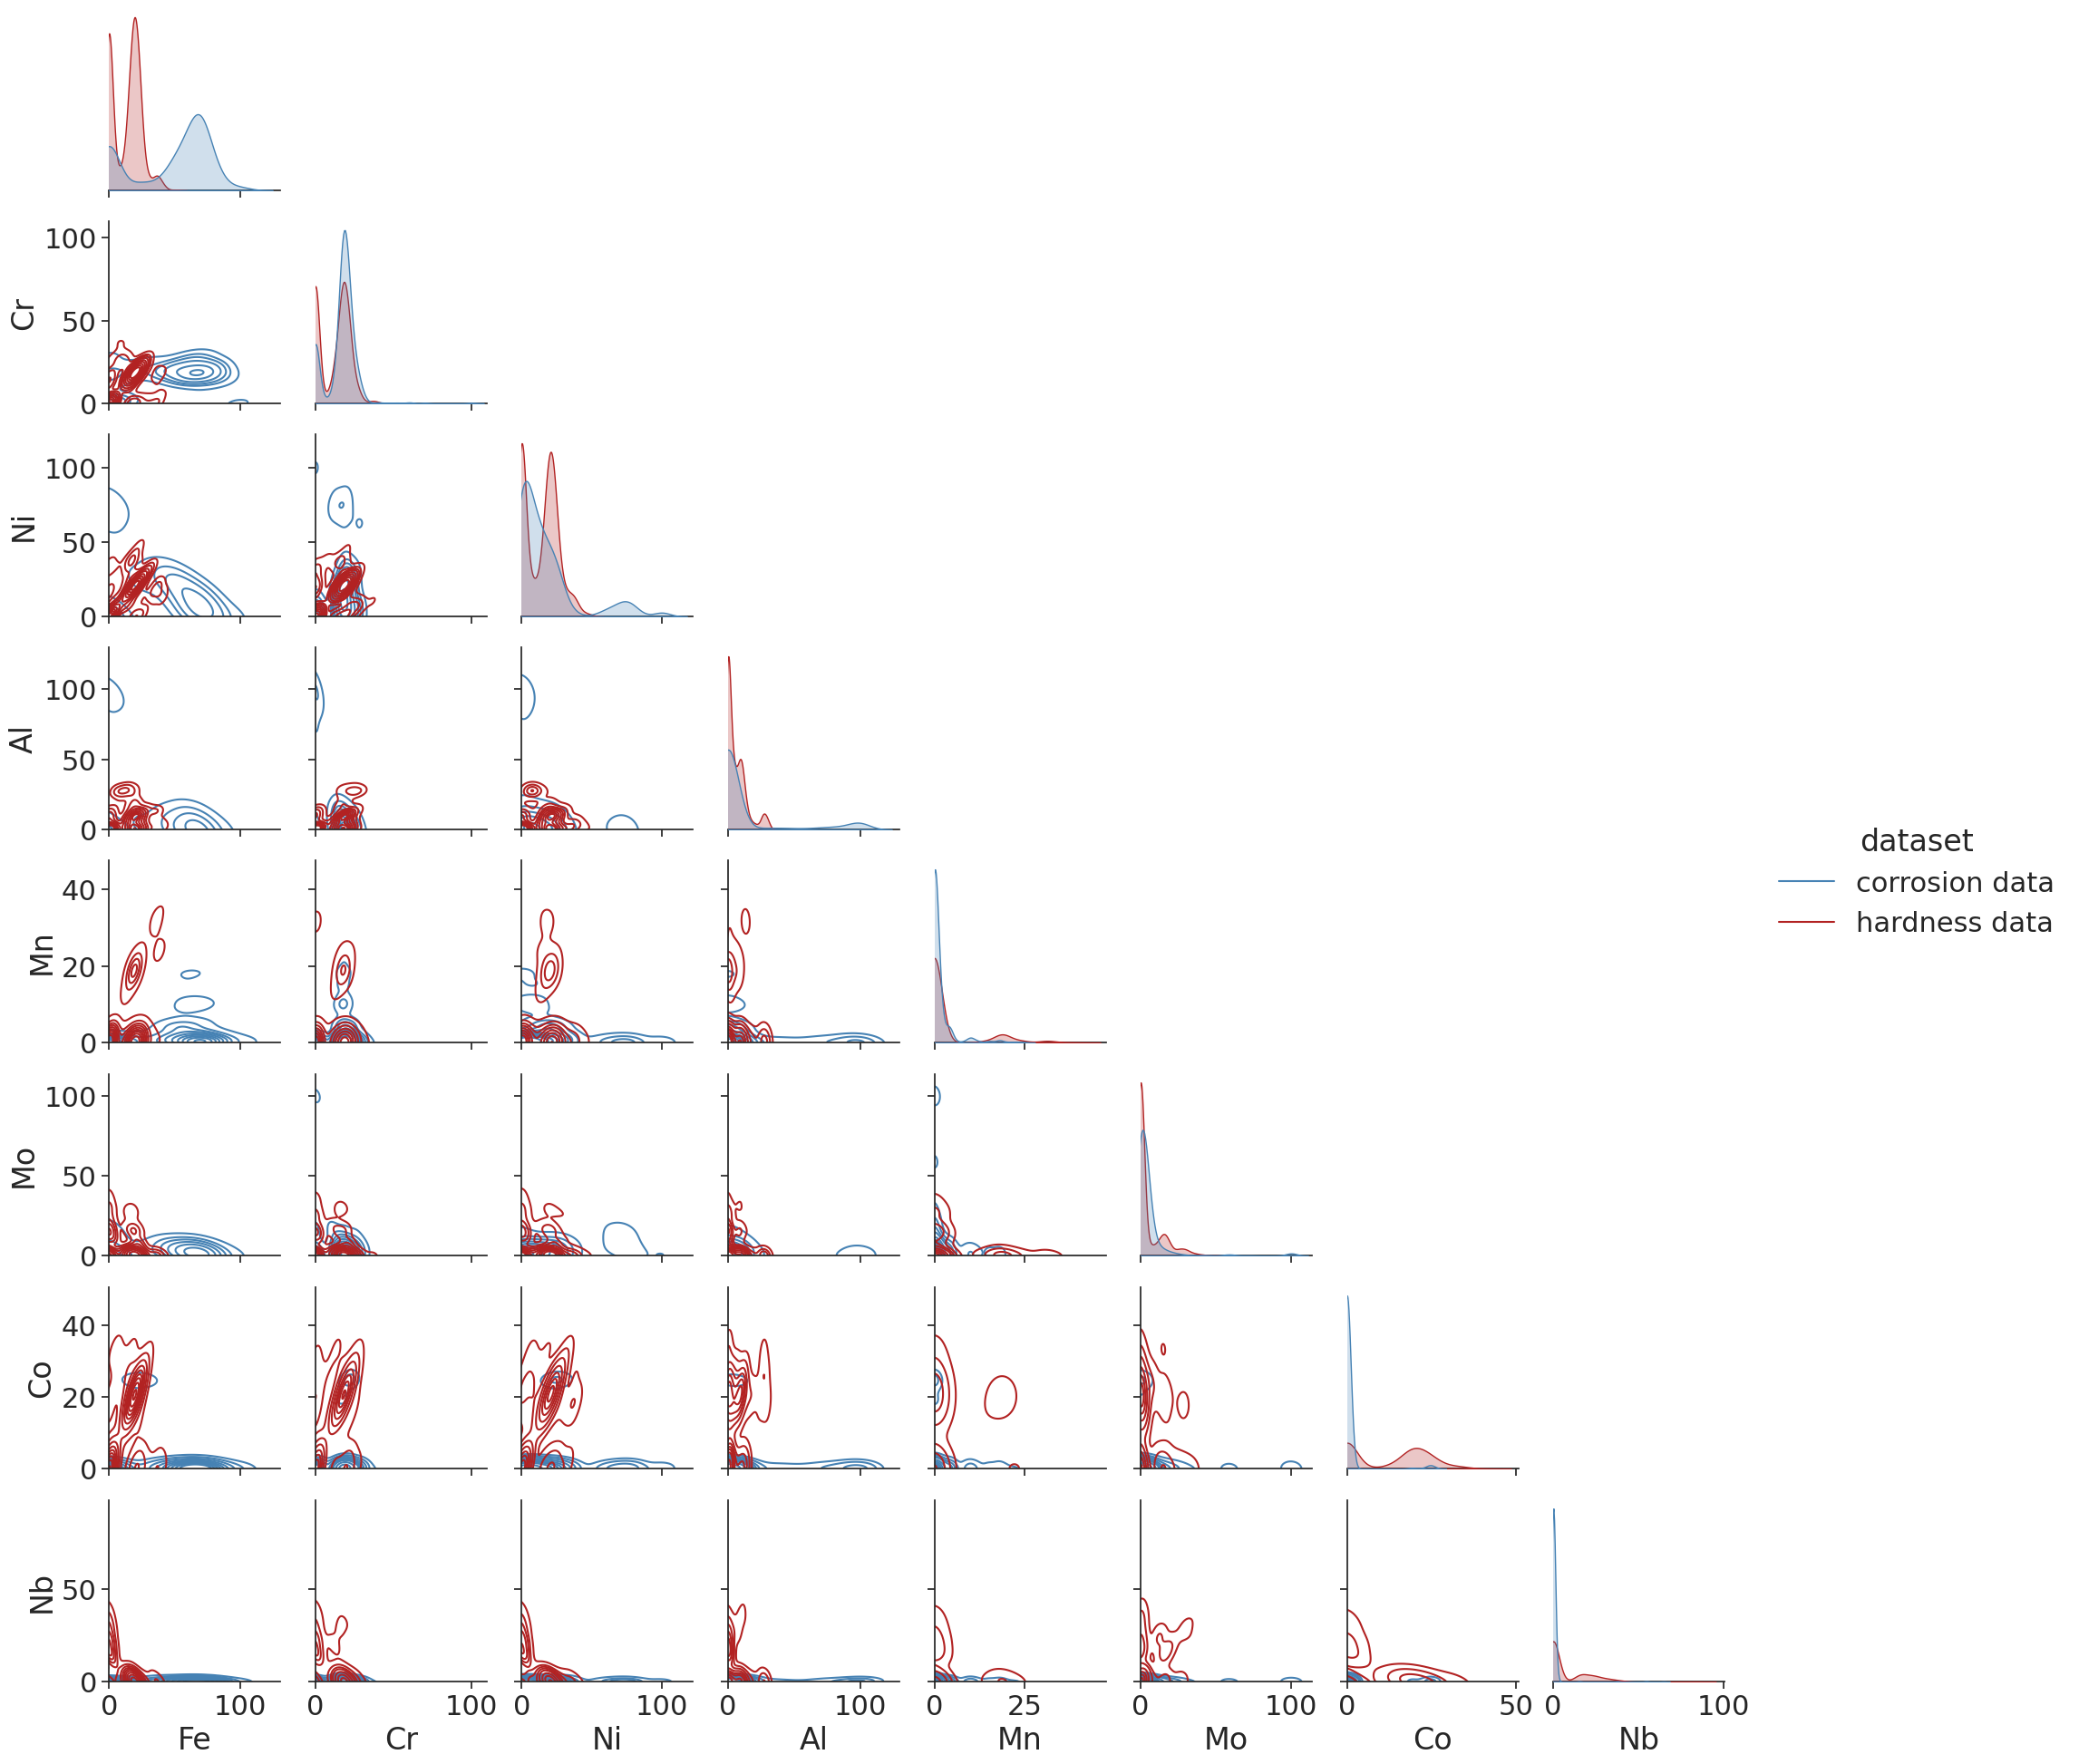

In [4]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the context parameters to control the plot aesthetics, including font scale
sns.set_context("notebook", font_scale=2)

# Define color palette for the pairplot
palette = ["steelblue", "firebrick"]

# Create a pairplot for the selected variables, using Kernel Density Estimate (KDE) plots
# Corner=True will plot only the lower triangle
grid = sns.pairplot(df_compo_conc, vars=['Fe', 'Cr', 'Ni', 'Al', 'Mn', 'Mo', 'Co', 'Nb'],
                    kind="kde", corner=True, hue="dataset", palette=palette)

# Loop through the axes to adjust the x and y limits
for i in range(len(grid.axes)):
    for j in range(len(grid.axes[i])):
        ax = grid.axes[i][j]
        # If the current axis is not None, set the lower limit to 0 while leaving the upper limit unchanged
        if ax is not None:
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)

# Save the plot as an image file
plt.savefig('pairplot_compo_section.png')

# Display the pairplot
plt.show()


show the overlap between the engineered feature space


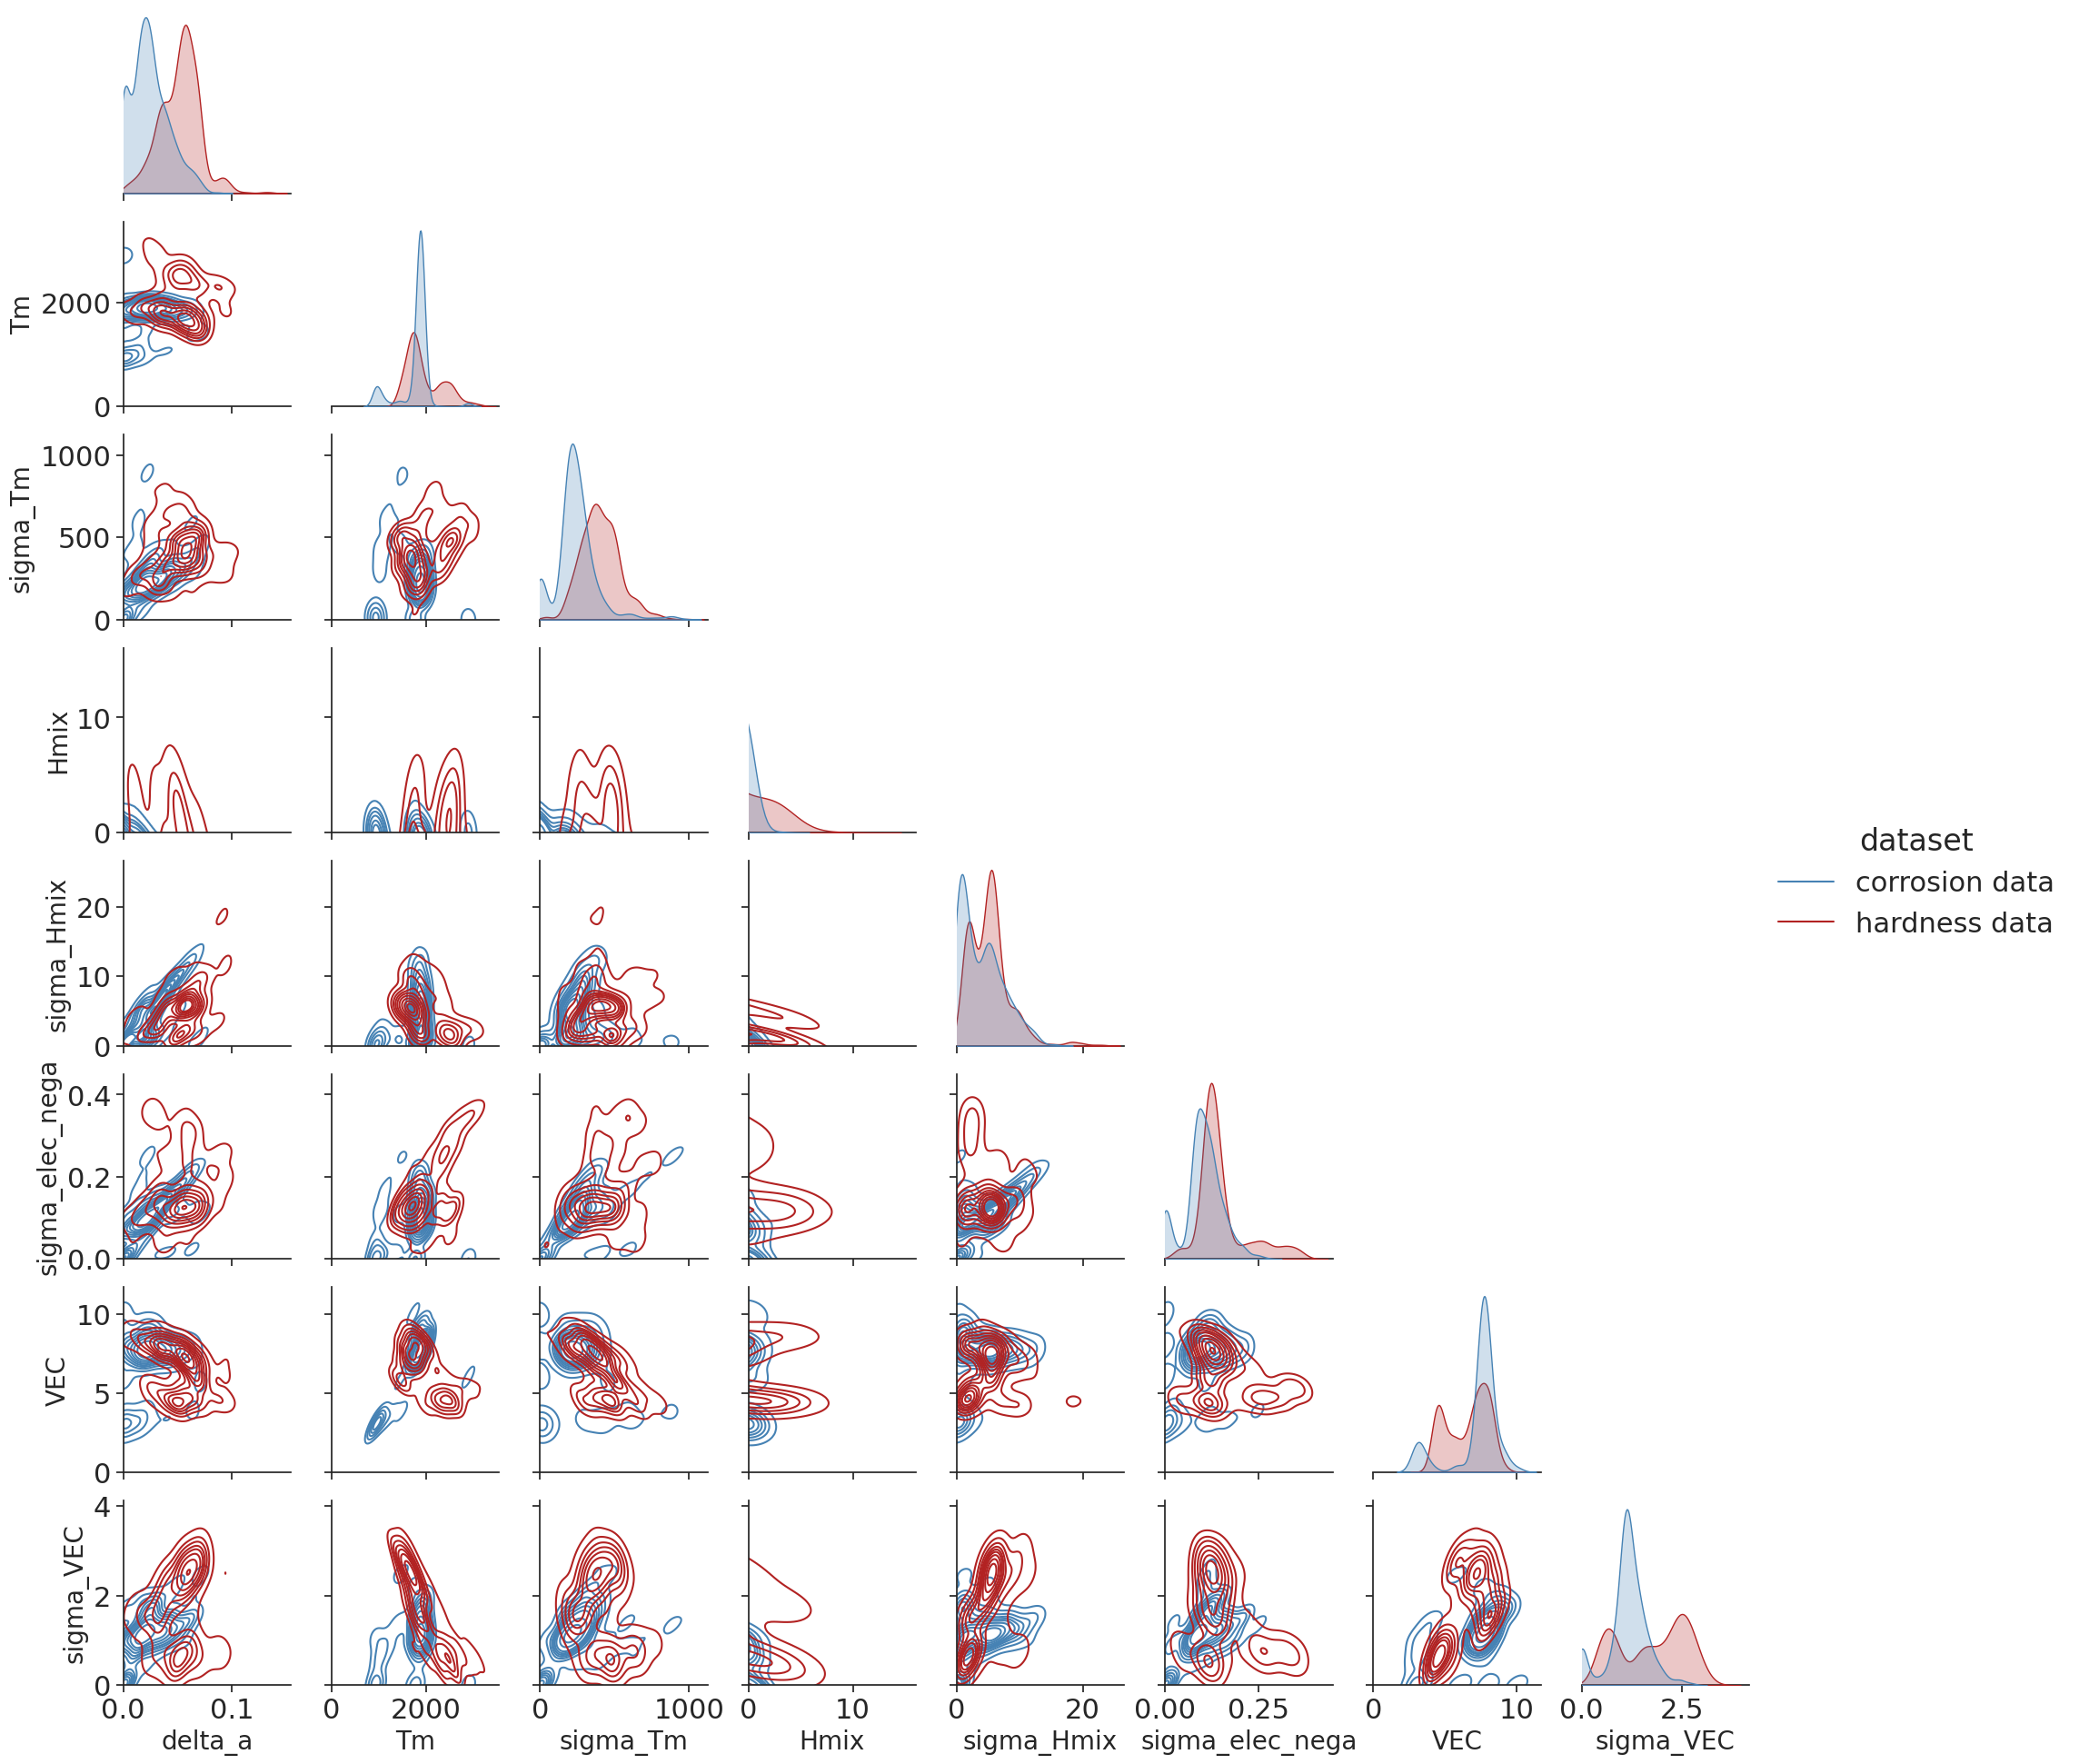

In [5]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the context parameters to control the plot aesthetics, including font scale
sns.set_context("notebook", font_scale=2)

# Define color palette for the pairplot
palette = ["steelblue", "firebrick"]

# Create a pairplot for the selected variables, using Kernel Density Estimate (KDE) plots
# Corner=True will plot only the lower triangle
grid = sns.pairplot(df_compo_specific_features_conc, vars=specific_features_sel_column,
                    kind="kde", corner=True, hue="dataset", palette=palette)

# Loop through the axes to adjust the x and y limits
for i in range(len(grid.axes)):
    for j in range(len(grid.axes[i])):
        ax = grid.axes[i][j]
        # If the current axis is not None, set the lower limit to 0 while leaving the upper limit unchanged
        if ax is not None:
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
            ax.xaxis.label.set_size(20)  # Set the x-axis label size
            ax.yaxis.label.set_size(20)  # Set the y-axis label size

# Save the plot as an image file
plt.savefig('pairplot_feature.png')

# Display the pairplot
plt.show()

### Pairplot (full) for both hardness and corrosion datasets

Taylor2018: Taylor et al.\_Integrated computational materials engineering of corrosion resistant alloys_2018

Expanding Marcus's conceptual model to explain the ability of alloying elements to impart localized corrosion resistance

- others: 'Fe', 'Ni', 'Co', 'Cu', 'Si'
- Passivity promotor: 'Cr', 'Ti', 'Al', 'V', 'Mn'
- Dissolution blocker: 'Mo', 'W', 'Nb', 'Ta'


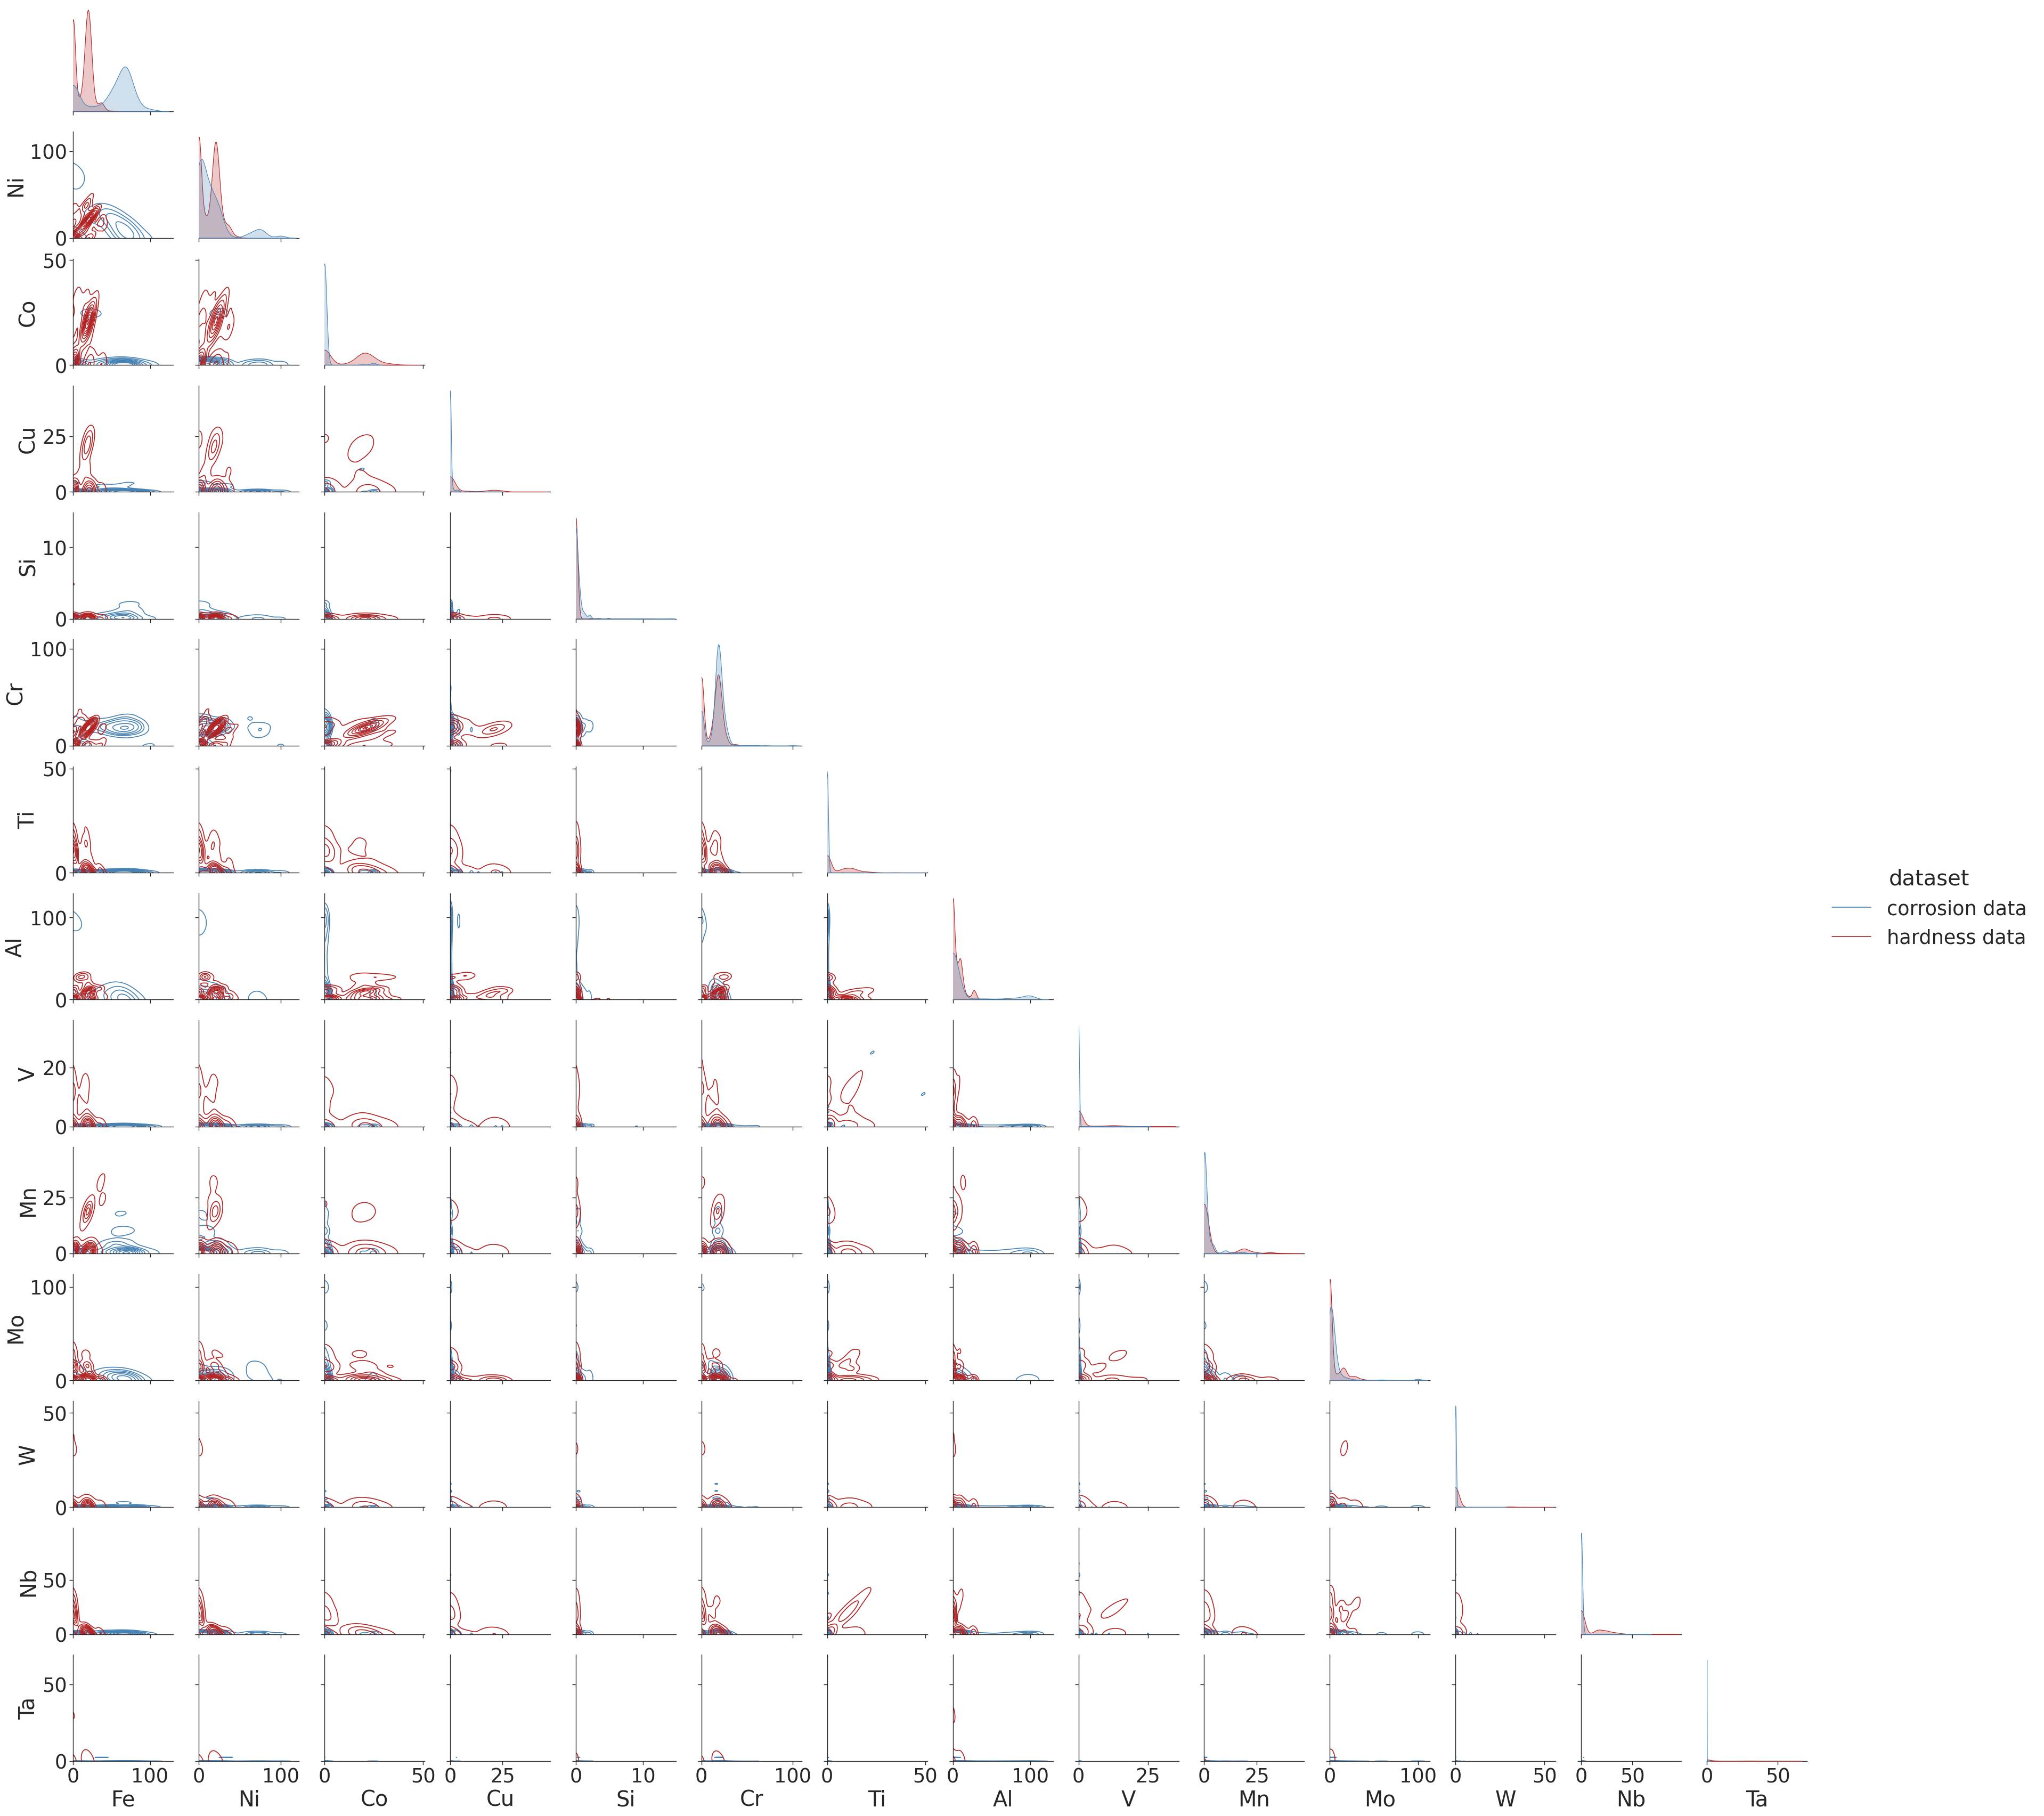

In [6]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots to have ticks and color codes
sns.set(style="ticks", color_codes=True)

# Set the context to 'paper' for better aesthetics in a paper, increase font scale for readability
sns.set_context("paper", font_scale=3)

# Define color palette for the pairplot with two colors: firebrick and dodgerblue
palette = ["steelblue", "firebrick"]

# Generate pairplot for the selected variables in the dataframe (df_conc)
# The plot type is Kernel Density Estimate (kde) to visualize the probability density of the data
# 'corner=True' means plot only the lower triangle, 'hue' parameter is used to group by 'dataset'
sns_fig = sns.pairplot(df_compo_conc, vars=['Fe', 'Ni', 'Co', 'Cu', 'Si', 'Cr', 'Ti', 'Al', 'V', 'Mn', 'Mo', 'W', 'Nb', 'Ta'],
                       kind="kde", corner=True, hue="dataset", palette=palette)

# Iterate over each axis in the pairplot to set the x and y limits
for i in range(len(sns_fig.axes)):
    for j in range(len(sns_fig.axes[i])):
        ax = sns_fig.axes[i][j]
        # If the current axis is not None, set the lower limit to 0 while leaving the upper limit unchanged
        if ax is not None:
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)

# Save the pairplot as an image file
sns_fig.savefig('pairplot_compo_full.png')

# Display the pairplot
plt.show()
